#Scraping Data

In [ ]:
import requests
from bs4 import BeautifulSoup

main_url = "https://www.spicemarketcolour.com.au/celebrities"
# Mengambil konten HTML dari URL
response = requests.get(main_url)
html_content = response.text

# Membuat objek BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Mengambil semua elemen dengan kelas 'sqs-block-image-link'
links = soup.find_all(class_="sqs-block-image-link")

# Meloopi semua elemen dan mencetak tautan
list_link = []
for link in links:
    list_link.append(link.get('href'))


In [ ]:
list_sublink = []
url = "https://www.spicemarketcolour.com.au"
for link in list_link:
  sub_link = url + link
  list_sublink.append(sub_link)
list_sublink

['https://www.spicemarketcolour.com.au/bright-spring-celebrities',
 'https://www.spicemarketcolour.com.au/true-spring-celebrities',
 'https://www.spicemarketcolour.com.au/light-spring-celebrities',
 'https://www.spicemarketcolour.com.au/light-summer-celebrities',
 'https://www.spicemarketcolour.com.au/true-summer-celebrities',
 'https://www.spicemarketcolour.com.au/soft-summer-celebrities',
 'https://www.spicemarketcolour.com.au/soft-autumn-celebrities',
 'https://www.spicemarketcolour.com.au/true-autumn-celebrities',
 'https://www.spicemarketcolour.com.au/dark-autumn-celebrities',
 'https://www.spicemarketcolour.com.au/dark-winter-celebrities',
 'https://www.spicemarketcolour.com.au/true-winter-celebrities',
 'https://www.spicemarketcolour.com.au/bright-winter-celebrities']

In [ ]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.7/467.7 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.2 MB/s eta 0:00:00
Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRel

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


In [ ]:
!pip install webdriver_manager
from webdriver_manager.chrome import ChromeDriverManager


In [ ]:
# Set up for running selenium in Google Colab
## You don't need to run this code if you do it in Jupyter notebook, or other local Python setting
%%shell
sudo apt -y update
sudo apt install -y wget curl unzip
wget http://archive.ubuntu.com/ubuntu/pool/main/libu/libu2f-host/libu2f-udev_1.1.4-1_all.deb
dpkg -i libu2f-udev_1.1.4-1_all.deb
wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
dpkg -i google-chrome-stable_current_amd64.deb
CHROME_DRIVER_VERSION=`curl -sS chromedriver.storage.googleapis.com/LATEST_RELEASE`
wget -N https://chromedriver.storage.googleapis.com/$CHROME_DRIVER_VERSION/chromedriver_linux64.zip -P /tmp/
unzip -o /tmp/chromedriver_linux64.zip -d /tmp/
chmod +x /tmp/chromedriver
mv /tmp/chromedriver /usr/local/bin/chromedriver
pip install selenium

In [ ]:
!pip install chromedriver-autoinstaller

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

import time
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
import chromedriver_autoinstaller

# setup chrome options
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') # ensure GUI is off
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# set path to chromedriver as per your configuration
chromedriver_autoinstaller.install()

# set up the webdriver
driver = webdriver.Chrome(options=chrome_options)

In [ ]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

In [ ]:
import os
i = 0
j = 0
while j < 4:
  for link in list_sublink[i:i+3]:
    print(link)
    nama_folder = str(j)
    folder_utama = '/content/gambar'
    if not os.path.exists(folder_utama):
      os.makedirs(folder_utama)
    path = os.path.join(folder_utama, nama_folder)
    if not os.path.exists(path):
      os.makedirs(path)

    # Buka halaman web
    driver.get(link)

    # Temukan elemen gambar berdasarkan kelas
    images = driver.find_elements(By.CSS_SELECTOR, 'img.thumb-image.loaded')

    # Pastikan terdapat elemen gambar sebelum melakukan iterasi
    if images:
        # Lakukan iterasi dan unduh gambar
        for idx, img in enumerate(images):
            data_src = img.get_attribute('data-src')
            if data_src:
                img_data = requests.get(data_src).content
                img_filename = path + '/image_'+str(idx) +'.jpg'
                with open(img_filename, 'wb') as handler:
                    handler.write(img_data)
    i += 1
  j += 1








https://www.spicemarketcolour.com.au/bright-spring-celebrities
https://www.spicemarketcolour.com.au/true-spring-celebrities
https://www.spicemarketcolour.com.au/light-spring-celebrities
https://www.spicemarketcolour.com.au/light-summer-celebrities
https://www.spicemarketcolour.com.au/true-summer-celebrities
https://www.spicemarketcolour.com.au/soft-summer-celebrities
https://www.spicemarketcolour.com.au/soft-autumn-celebrities
https://www.spicemarketcolour.com.au/true-autumn-celebrities
https://www.spicemarketcolour.com.au/dark-autumn-celebrities
https://www.spicemarketcolour.com.au/dark-winter-celebrities
https://www.spicemarketcolour.com.au/true-winter-celebrities
https://www.spicemarketcolour.com.au/bright-winter-celebrities


#Deteksi Warna Wajah dan Bola Mata (FaRL)

In [ ]:
!pip install opencv-python-headless


In [ ]:
!wget https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_default.xml


--2024-05-21 11:13:39--  https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml [following]
--2024-05-21 11:13:39--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.06s   

2024

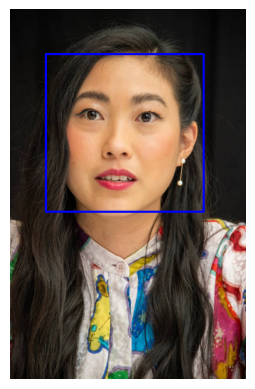

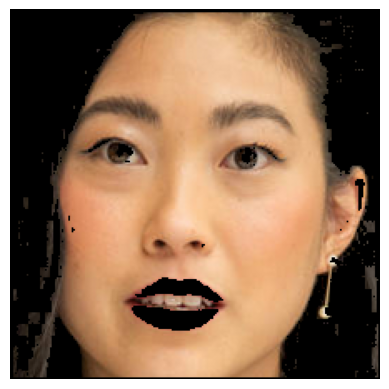

Average Skin Color (RGB): [131.70745069  98.39601088  72.33970457]
Average Skin Color (Hex): #836248


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path ke file Haar Cascade
cascade_path = 'haarcascade_frontalface_default.xml'

# Muat Haar Cascade
face_cascade = cv2.CascadeClassifier(cascade_path)

# Fungsi untuk mendeteksi warna kulit pada gambar
def skin_detection(image):
    # Konversi gambar ke ruang warna YCrCb
    ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

    # Definisi batasan warna kulit dalam ruang YCrCb
    lower_skin = np.array([0, 133, 77], dtype=np.uint8)
    upper_skin = np.array([255, 173, 127], dtype=np.uint8)

    # Masking untuk mendapatkan area kulit
    mask = cv2.inRange(ycrcb, lower_skin, upper_skin)

    # Aplikasikan mask ke gambar asli
    skin = cv2.bitwise_and(image, image, mask=mask)

    return skin

# Fungsi untuk mendeteksi warna kulit pada wajah yang terdeteksi
def detect_skin_color(image, face_coords):
    x, y, w, h = face_coords

    # Potong bagian wajah dari gambar asli
    face_image = image[y:y+h, x:x+w]

    # Deteksi warna kulit pada bagian wajah
    skin_detected = skin_detection(face_image)  # Gunakan fungsi skin_detection

    # Konversi BGR ke RGB untuk ditampilkan dengan matplotlib
    skin_rgb = cv2.cvtColor(skin_detected, cv2.COLOR_BGR2RGB)

    # Tampilkan hasil deteksi warna kulit pada bagian wajah
    plt.imshow(skin_rgb)
    plt.axis('off')
    plt.show()

    # Hitung rata-rata warna kulit dalam representasi BGR
    avg_color_per_row = np.average(skin_detected, axis=0)
    avg_color = np.average(avg_color_per_row, axis=0)

    # Konversi dari BGR ke RGB
    avg_color_rgb = avg_color[::-1]  # BGR ke RGB

    # Konversi dari RGB ke hex
    avg_color_hex = '#{:02x}{:02x}{:02x}'.format(int(avg_color_rgb[0]), int(avg_color_rgb[1]), int(avg_color_rgb[2]))

    return avg_color_rgb, avg_color_hex

# Fungsi untuk mendeteksi wajah pertama
def detect_first_face(image_path):
    # Muat gambar
    image = cv2.imread(image_path)

    # Periksa apakah gambar berhasil dimuat
    if image is None:
        print(f"Error: Gambar tidak ditemukan atau path salah: {image_path}")
        return

    # Ubah gambar ke dalam skala abu-abu
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Deteksi wajah
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Jika wajah ditemukan, ambil koordinat wajah pertama
    if len(faces) > 0:
        x, y, w, h = faces[0]

        # Gambar persegi di sekitar wajah pertama yang terdeteksi
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

        # Tampilkan gambar dengan persegi di sekitar wajah
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image_rgb)
        plt.axis('off')
        plt.show()

        # Deteksi warna kulit pada wajah yang terdeteksi dan dapatkan nilai rata-rata RGB dan kode hex
        avg_skin_color_rgb, avg_skin_color_hex = detect_skin_color(image, (x, y, w, h))
        print("Average Skin Color (RGB):", avg_skin_color_rgb)
        print("Average Skin Color (Hex):", avg_skin_color_hex)
    else:
        print("Wajah tidak ditemukan dalam gambar.")

# Gunakan nama file yang diunggah sebagai path ke gambar
image_path = "/content/gambar/3/image_17.jpg"

# Panggil fungsi untuk mendeteksi wajah pertama
detect_first_face(image_path)


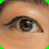

Warna bola mata (RGB): [103 176 193]
Warna bola mata (Hex): #c1b067


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


# Load pre-trained Haar Cascade Classifier untuk deteksi mata
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Baca gambar
image_path = "/content/gambar/3/image_17.jpg"  # Ganti dengan path yang sesuai
image = cv2.imread(image_path)

# Ubah gambar menjadi grayscale (lebih cepat untuk deteksi)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Lakukan deteksi mata
eyes = eye_cascade.detectMultiScale(gray)

# Jika ada mata yang terdeteksi, ambil mata pertama saja
if len(eyes) > 0:
    (x, y, w, h) = eyes[0]  # Ambil koordinat kotak untuk mata pertama
    eye_roi = image[y:y+h, x:x+w]  # Ambil ROI (Region of Interest) mata

    # Ubah gambar mata menjadi grayscale
    eye_gray = cv2.cvtColor(eye_roi, cv2.COLOR_BGR2GRAY)

    # Thresholding gambar mata
    _, eye_thresh = cv2.threshold(eye_gray, 50, 255, cv2.THRESH_BINARY)

    # Temukan kontur dalam gambar mata
    contours, _ = cv2.findContours(eye_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Ambil kontur bola mata (kontur terbesar)
    if len(contours) > 0:
        eye_contour = max(contours, key=cv2.contourArea)

        # Hitung lingkaran yang melingkupi kontur bola mata
        ((cx, cy), radius) = cv2.minEnclosingCircle(eye_contour)
        center = (int(cx), int(cy))
        radius = int(radius)

        # Gambar lingkaran pada bola mata
        cv2.circle(eye_roi, center, radius, (0, 255, 0), 2)

        # Hitung rata-rata warna dalam lingkaran melingkupi bola mata
        eye_color_roi = eye_roi[int(cy)-radius:int(cy)+radius, int(cx)-radius:int(cx)+radius]
        eye_color_rgb = np.mean(eye_color_roi, axis=(0, 1)).astype(int)

        # Konversi rata-rata warna menjadi kode warna Hex
        eye_color_hex = '#{:02x}{:02x}{:02x}'.format(eye_color_rgb[2], eye_color_rgb[1], eye_color_rgb[0])

        # Tampilkan hasil
        cv2_imshow(eye_roi)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

        print("Warna bola mata (RGB):", eye_color_rgb)
        print("Warna bola mata (Hex):", eye_color_hex)
    else:
        print("Kontur bola mata tidak ditemukan.")
else:
    print("Mata tidak terdeteksi.")


#Pembentukan Dataset

In [ ]:

# Path ke folder yang berisi folder-folder dengan gambar
root_folder = "/content/gambar"  # Ganti dengan path yang sesuai

# List untuk menyimpan hasil deteksi dari setiap gambar
kulit = []

# Loop melalui setiap folder di root_folder
for folder_name in os.listdir(root_folder):
    folder_path = os.path.join(root_folder, folder_name)
    if not os.path.isdir(folder_path):
        continue

    # Loop melalui setiap file gambar dalam folder
    for image_name in os.listdir(folder_path):
      image_path = os.path.join(folder_path, image_name)
      if not os.path.isfile(image_path):
            continue

      # Path ke file Haar Cascade
      cascade_path = 'haarcascade_frontalface_default.xml'

      # Muat Haar Cascade
      face_cascade = cv2.CascadeClassifier(cascade_path)

      # Fungsi untuk mendeteksi warna kulit pada gambar
      def skin_detection(image):
          # Konversi gambar ke ruang warna YCrCb
          ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

          # Definisi batasan warna kulit dalam ruang YCrCb
          lower_skin = np.array([0, 133, 77], dtype=np.uint8)
          upper_skin = np.array([255, 173, 127], dtype=np.uint8)

          # Masking untuk mendapatkan area kulit
          mask = cv2.inRange(ycrcb, lower_skin, upper_skin)

          # Aplikasikan mask ke gambar asli
          skin = cv2.bitwise_and(image, image, mask=mask)

          return skin

      # Fungsi untuk mendeteksi warna kulit pada wajah yang terdeteksi
      def detect_skin_color(image, face_coords):
          x, y, w, h = face_coords

          # Potong bagian wajah dari gambar asli
          face_image = image[y:y+h, x:x+w]

          # Deteksi warna kulit pada bagian wajah
          skin_detected = skin_detection(face_image)  # Gunakan fungsi skin_detection

          # Konversi BGR ke RGB untuk ditampilkan dengan matplotlib
          skin_rgb = cv2.cvtColor(skin_detected, cv2.COLOR_BGR2RGB)


          # Hitung rata-rata warna kulit dalam representasi BGR
          avg_color_per_row = np.average(skin_detected, axis=0)
          avg_color = np.average(avg_color_per_row, axis=0)

          # Konversi dari BGR ke RGB
          avg_color_rgb = avg_color[::-1]  # BGR ke RGB

          # Konversi dari RGB ke hex
          avg_color_hex = '#{:02x}{:02x}{:02x}'.format(int(avg_color_rgb[0]), int(avg_color_rgb[1]), int(avg_color_rgb[2]))

          return avg_color_rgb, avg_color_hex

      # Fungsi untuk mendeteksi wajah pertama
      def detect_first_face(image_path):
          # Muat gambar
          image = cv2.imread(image_path)

          # Periksa apakah gambar berhasil dimuat
          if image is None:
              print(f"Error: Gambar tidak ditemukan atau path salah: {image_path}")
              return

          # Ubah gambar ke dalam skala abu-abu
          gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

          # Deteksi wajah
          faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

          # Jika wajah ditemukan, ambil koordinat wajah pertama
          if len(faces) > 0:
              x, y, w, h = faces[0]

              # Gambar persegi di sekitar wajah pertama yang terdeteksi
              cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

              # Tampilkan gambar dengan persegi di sekitar wajah
              image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

              # Deteksi warna kulit pada wajah yang terdeteksi dan dapatkan nilai rata-rata RGB dan kode hex
              avg_skin_color_rgb, avg_skin_color_hex = detect_skin_color(image, (x, y, w, h))

              return avg_skin_color_hex
          else:
              return
      warna = detect_first_face(image_path)
      kulit.append(warna)



In [ ]:
len(kulit)

280

In [ ]:
# Path ke folder yang berisi folder-folder dengan gambar
root_folder = "/content/gambar"  # Ganti dengan path yang sesuai

# List untuk menyimpan hasil deteksi dari setiap gambar
mata = []

# Loop melalui setiap folder di root_folder
for folder_name in os.listdir(root_folder):
    folder_path = os.path.join(root_folder, folder_name)
    if not os.path.isdir(folder_path):
        continue

    # Loop melalui setiap file gambar dalam folder
    for image_name in os.listdir(folder_path):
      image_path = os.path.join(folder_path, image_name)
      if not os.path.isfile(image_path):
            continue

      # Load pre-trained Haar Cascade Classifier untuk deteksi mata
      eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
      # Ganti dengan path yang sesuai
      image = cv2.imread(image_path)

      # Ubah gambar menjadi grayscale (lebih cepat untuk deteksi)
      gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

      # Lakukan deteksi mata
      eyes = eye_cascade.detectMultiScale(gray)

      # Jika ada mata yang terdeteksi, ambil mata pertama saja
      if len(eyes) > 0:
          (x, y, w, h) = eyes[0]  # Ambil koordinat kotak untuk mata pertama
          eye_roi = image[y:y+h, x:x+w]  # Ambil ROI (Region of Interest) mata

          # Ubah gambar mata menjadi grayscale
          eye_gray = cv2.cvtColor(eye_roi, cv2.COLOR_BGR2GRAY)

          # Thresholding gambar mata
          _, eye_thresh = cv2.threshold(eye_gray, 50, 255, cv2.THRESH_BINARY)

          # Temukan kontur dalam gambar mata
          contours, _ = cv2.findContours(eye_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

          # Ambil kontur bola mata (kontur terbesar)
          if len(contours) > 0:
              eye_contour = max(contours, key=cv2.contourArea)

              # Hitung lingkaran yang melingkupi kontur bola mata
              ((cx, cy), radius) = cv2.minEnclosingCircle(eye_contour)
              center = (int(cx), int(cy))
              radius = int(radius)

              # Gambar lingkaran pada bola mata
              cv2.circle(eye_roi, center, radius, (0, 255, 0), 2)

              # Hitung rata-rata warna dalam lingkaran melingkupi bola mata
              eye_color_roi = eye_roi[int(cy)-radius:int(cy)+radius, int(cx)-radius:int(cx)+radius]
              eye_color_rgb = np.mean(eye_color_roi, axis=(0, 1)).astype(int)

              # Konversi rata-rata warna menjadi kode warna Hex
              eye_color_hex = '#{:02x}{:02x}{:02x}'.format(eye_color_rgb[2], eye_color_rgb[1], eye_color_rgb[0])
              warna = eye_color_hex
              mata.append(warna)

      else:
              mata.append('#')



/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
<ipython-input-53-195f5c2e6780>:58: RuntimeWarning: invalid value encountered in cast
  eye_color_rgb = np.mean(eye_color_roi, axis=(0, 1)).astype(int)


In [ ]:
len(mata)

280

In [ ]:
# Path ke folder yang berisi folder-folder dengan gambar
root_folder = "/content/gambar"  # Ganti dengan path yang sesuai

# List untuk menyimpan hasil deteksi dari setiap gambar
label = []
seasonal = ['spring', 'summer', 'autumn', 'winter']

# Loop melalui setiap folder di root_folder
for folder_name in os.listdir(root_folder):
    folder_path = os.path.join(root_folder, folder_name)
    if not os.path.isdir(folder_path):
        continue

    # Loop melalui setiap file gambar dalam folder
    for image_name in os.listdir(folder_path):
      image_path = os.path.join(folder_path, image_name)
      if not os.path.isfile(image_path):
            continue
      label.append(seasonal[int(folder_name)])

In [ ]:
len(label)

280

In [ ]:
data = {
    'Kulit': kulit,
    'Mata': mata,
    'Seasonal Color': label
}
df = pd.DataFrame(data)

In [ ]:
df.to_csv("dataset_personal_color.csv", index=False)

In [ ]:
import pandas as pd

In [ ]:
color = pd.read_csv("/content/dataset_personal_color.csv")

In [ ]:
color.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Kulit           263 non-null    object
 1   Mata            263 non-null    object
 2   Seasonal Color  263 non-null    object
dtypes: object(3)
memory usage: 6.3+ KB


In [ ]:
color

,Kulit,Mata,Seasonal Color
0,#936e5f,#cfa98c,summer
1,#916e56,#aec976,summer
2,#987a71,#bca793,summer
3,#896a60,#95895d,summer
4,#8b644c,#40e027,summer
...,...,...,...
258,#b08c81,#42ef38,spring
259,#b2907a,#c3a68e,spring
260,#ac794e,#afa65b,spring
261,#af8466,#e5caad,spring


#Pemodelan

##dengan analisis mata

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Fungsi untuk konversi hexcode ke RGB
def hex_to_rgb(hex_code):
    hex_code = hex_code.lstrip('#')
    return tuple(int(hex_code[i:i+2], 16) for i in (0, 2, 4))

df = color
# Konversi hexcode ke RGB
df['kulit_rgb'] = df['Kulit'].apply(hex_to_rgb)
df['mata_rgb'] = df['Mata'].apply(hex_to_rgb)

# Pecah RGB menjadi tiga kolom terpisah
df[['Skin_R', 'Skin_G', 'Skin_B']] = pd.DataFrame(df['kulit_rgb'].tolist(), index=df.index)
df[['Eye_R', 'Eye_G', 'Eye_B']] = pd.DataFrame(df['mata_rgb'].tolist(), index=df.index)

# Drop kolom yang tidak diperlukan
df.drop(['kulit_rgb', 'mata_rgb'], axis=1, inplace=True)

# Fitur dan label
X = df[['Skin_R', 'Skin_G', 'Skin_B', 'Eye_R', 'Eye_G', 'Eye_B']]
y = df['Seasonal Color']

# Label encoding pada target
le = LabelEncoder()
y = le.fit_transform(y)

# Split dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model RandomForestClassifier
model = RandomForestClassifier(n_estimators=500, random_state=42)

# Latih model
model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test)




In [ ]:
from sklearn.metrics import accuracy_score

# Menghitung akurasi
accuracy_rf = accuracy_score(y_test, y_pred)

# Menampilkan akurasi
print("Accuracy (Random Forest):", accuracy_rf)


Accuracy (Random Forest): 0.6226415094339622


In [ ]:
from sklearn.model_selection import cross_val_score

# Lakukan cross-validation dengan model RandomForestClassifier
cv_scores = cross_val_score(model, X, y, cv=5)

# Tampilkan hasil cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())


Cross-Validation Scores: [0.67924528 0.54716981 0.54716981 0.48076923 0.51923077]
Mean Cross-Validation Score: 0.5547169811320755


              precision    recall  f1-score   support

      autumn       0.62      0.56      0.59        18
      spring       0.57      0.80      0.67        10
      summer       0.58      0.58      0.58        12
      winter       0.73      0.62      0.67        13

    accuracy                           0.62        53
   macro avg       0.63      0.64      0.63        53
weighted avg       0.63      0.62      0.62        53



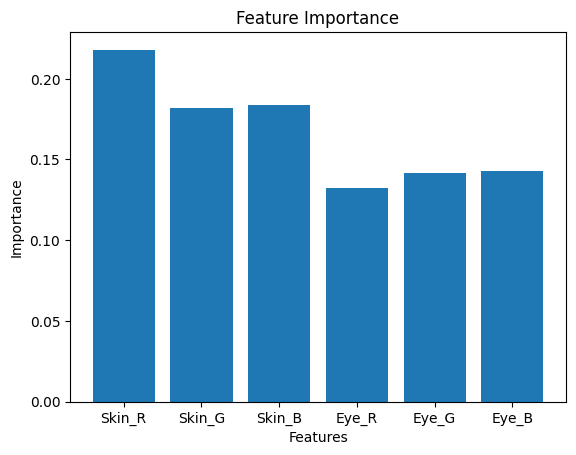

In [ ]:
# Evaluasi model
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Visualisasi importance fitur
importance = model.feature_importances_
plt.bar(['Skin_R', 'Skin_G', 'Skin_B', 'Eye_R', 'Eye_G', 'Eye_B'], importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

##tanpa analisis mata

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Fungsi untuk konversi hexcode ke RGB
def hex_to_rgb(hex_code):
    hex_code = hex_code.lstrip('#')
    return tuple(int(hex_code[i:i+2], 16) for i in (0, 2, 4))

df = color
# Konversi hexcode ke RGB
df['kulit_rgb'] = df['Kulit'].apply(hex_to_rgb)
df['mata_rgb'] = df['Mata'].apply(hex_to_rgb)

# Pecah RGB menjadi tiga kolom terpisah
df[['Skin_R', 'Skin_G', 'Skin_B']] = pd.DataFrame(df['kulit_rgb'].tolist(), index=df.index)
df[['Eye_R', 'Eye_G', 'Eye_B']] = pd.DataFrame(df['mata_rgb'].tolist(), index=df.index)

# Drop kolom yang tidak diperlukan
df.drop(['kulit_rgb', 'mata_rgb'], axis=1, inplace=True)

# Fitur dan label
X = df[['Skin_R', 'Skin_G', 'Skin_B']]
y = df['Seasonal Color']

# Label encoding pada target
le = LabelEncoder()
y = le.fit_transform(y)

# Split dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model RandomForestClassifier
model = RandomForestClassifier(n_estimators=500, random_state=42)

# Latih model
model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

# Menghitung akurasi
accuracy_rf = accuracy_score(y_test, y_pred)

# Menampilkan akurasi
print("Accuracy (Random Forest):", accuracy_rf)


Accuracy (Random Forest): 0.4339622641509434


In [ ]:
# Evaluasi model
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Visualisasi importance fitur
importance = model.feature_importances_
plt.bar(['Skin_R', 'Skin_G', 'Skin_B'], importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()